/Users/ciprian/Work/vortexplore.AI/AI/DataDefinitions.py:181: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.centroids = np.array([cluster.centroidValue for cluster in self.clusters])


<Figure size 1920x1920 with 0 Axes>

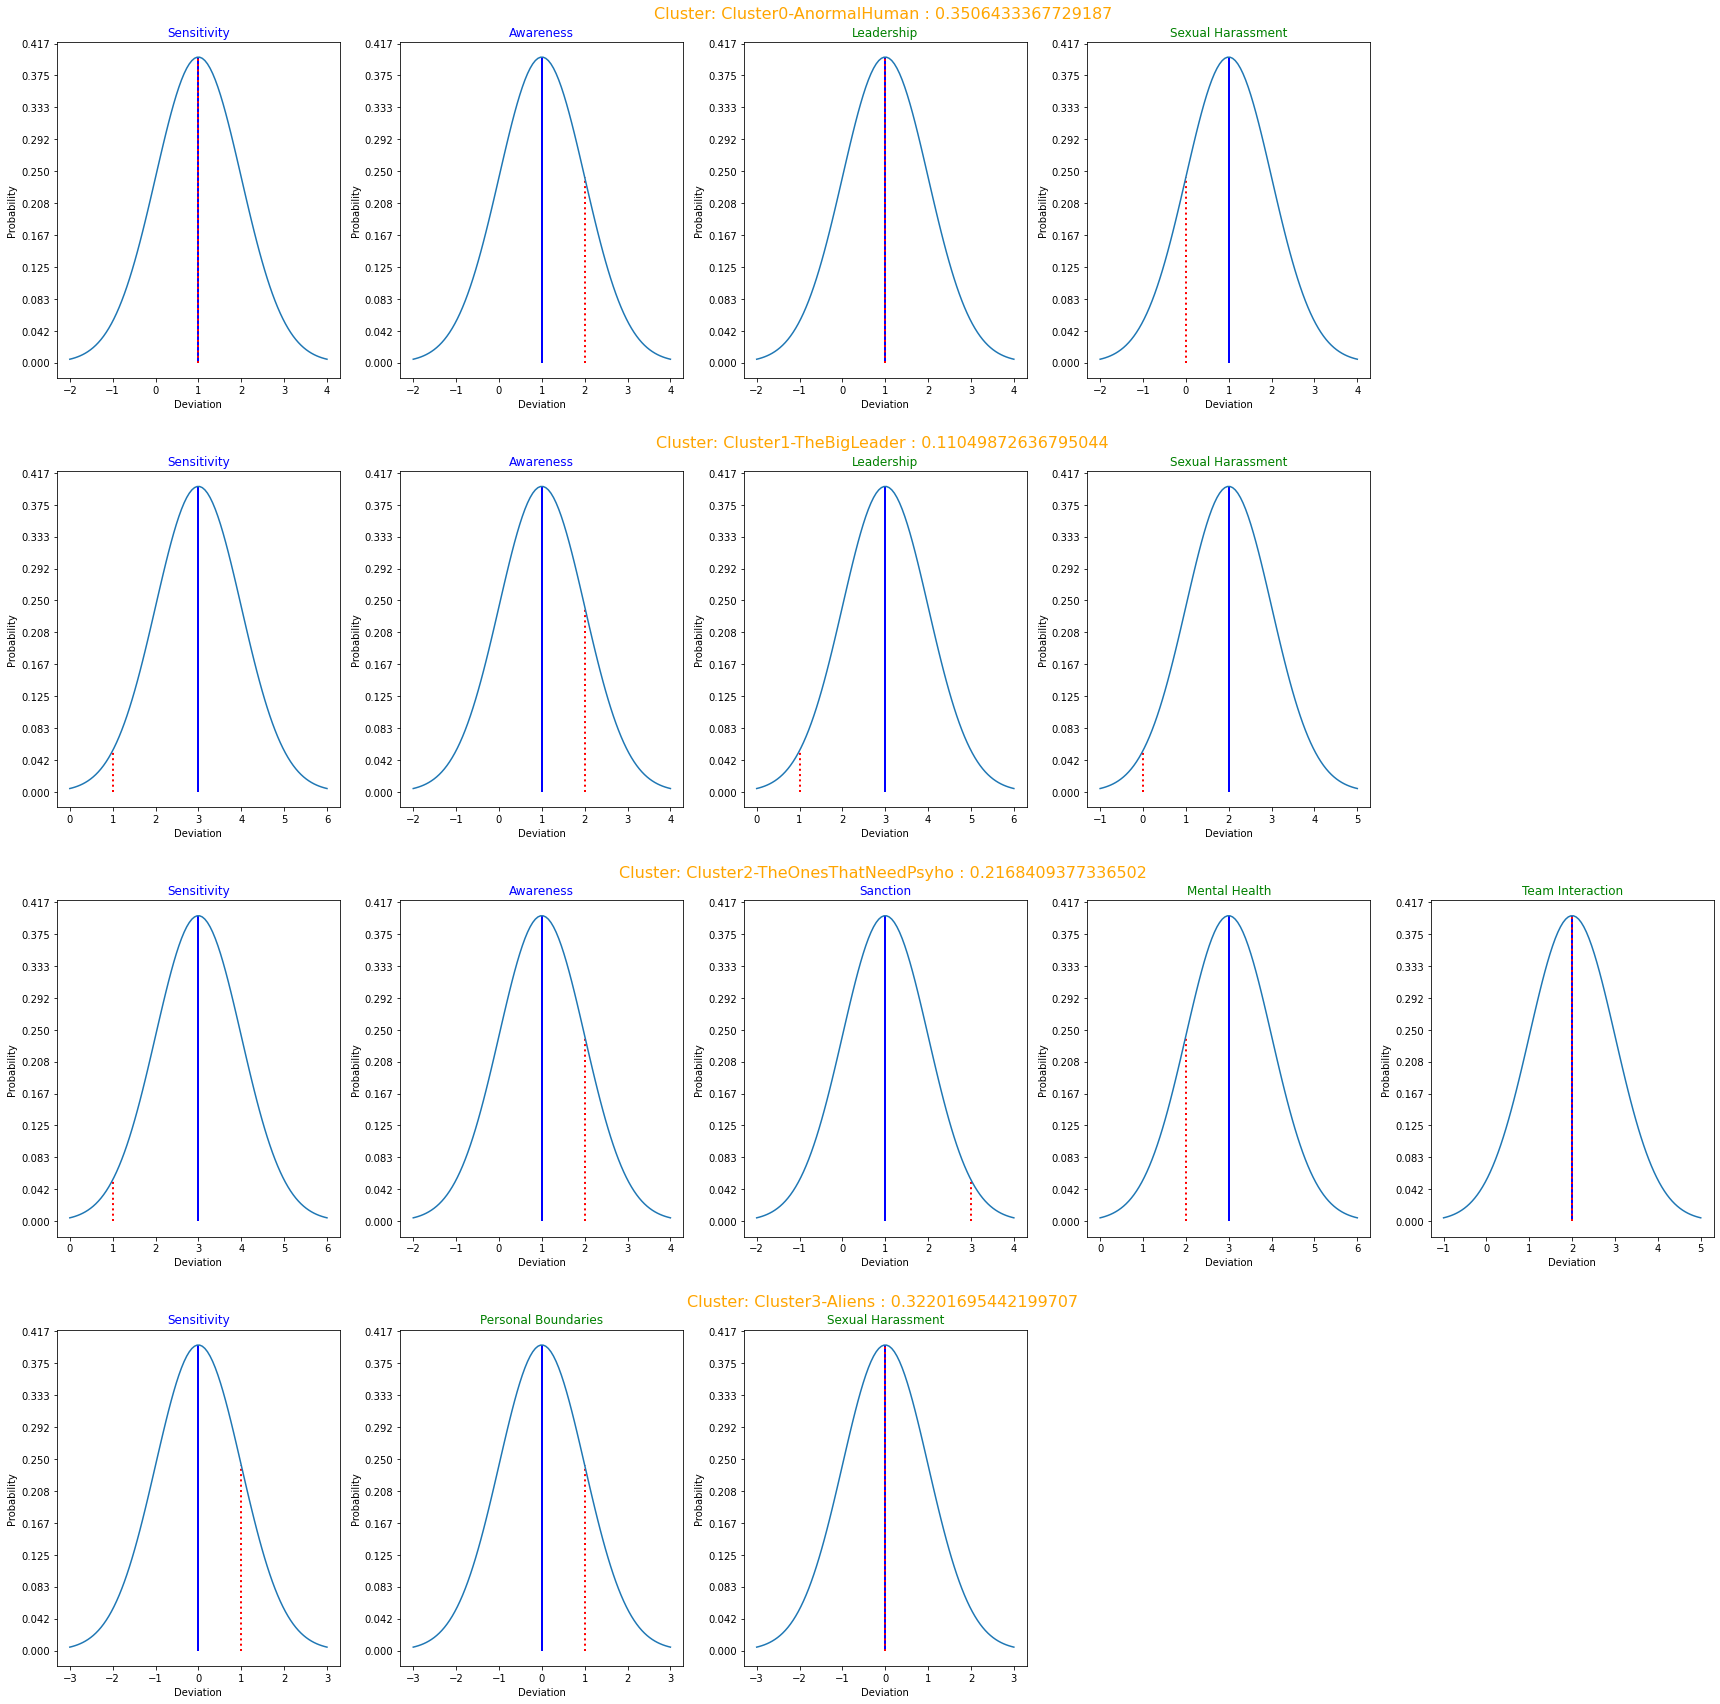

/Users/ciprian/Work/vortexplore.AI/AI/VisualizationUtils_2.py:137: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/Users/ciprian/Work/vortexplore.AI/AI/VisualizationUtils_2.py:69: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Figure size 432x288 with 0 Axes>

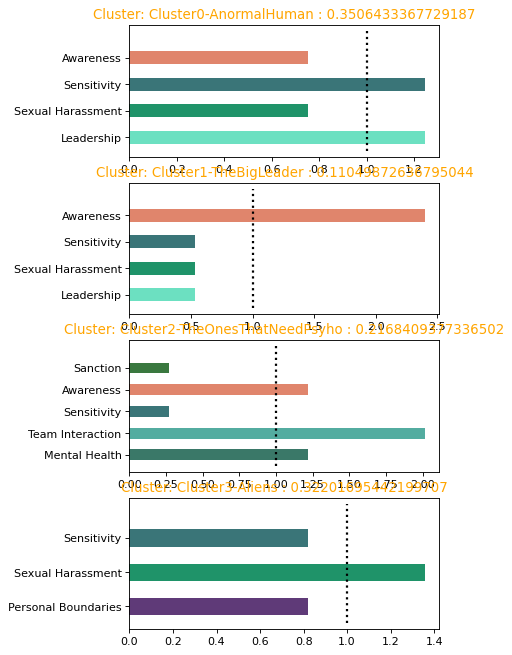

In [1]:
# TODO:

# Do the same at global, team level
# Bring the code in finally

# CSV + FIG out from file names

#### FIX THE SIGMA


# In 2 weeks - visualisation for offline data
# Another 2 weeks - Step by step explanation for the sequence of questions generated by the AI

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math
import sys
import seaborn as sns

sys.path.append("/Users/ciprian/Work/vortexplore.AI/AI")
from VisualizationUtils_2 import *
# Declare a cluster specification
type1_Spec = ManualSingleClusterSpec(category_features=[ManualClusterFeature(name="Sensitivity", mean=1, dev=1),
                                                         ManualClusterFeature(name="Awareness", mean=1, dev=1)],
                                    attributes_features=[ManualClusterFeature(name="Leadership", mean=1, dev=1),
                                                      ManualClusterFeature(name="Sexual Harassment", mean=1, dev=1)],
                                     name="Cluster0-AnormalHuman")

type2_Spec = ManualSingleClusterSpec(category_features=[ManualClusterFeature(name="Sensitivity", mean=3, dev=1),
                                                        ManualClusterFeature(name="Awareness", mean=1, dev=1)],
                                 attributes_features=[ManualClusterFeature(name="Leadership", mean=3, dev=1),
                                                      ManualClusterFeature(name="Sexual Harassment", mean=2, dev=1)],
                                     name="Cluster1-TheBigLeader")

type3_Spec = ManualSingleClusterSpec(category_features=[ManualClusterFeature(name="Sensitivity", mean=3, dev=1),
                                                        ManualClusterFeature(name="Awareness", mean=1, dev=1),
                                                         ManualClusterFeature(name="Sanction", mean=1, dev=1)],
                                 attributes_features=[ManualClusterFeature(name="Mental Health", mean=3, dev=1),
                                                      ManualClusterFeature(name="Team Interaction", mean=2, dev=1)],
                                                    name = "Cluster2-TheOnesThatNeedPsyho")

type4_Spec = ManualSingleClusterSpec(category_features=[ManualClusterFeature(name="Sensitivity", mean=0, dev=1)],
                                 attributes_features=[ManualClusterFeature(name="Personal Boundaries", mean=0, dev=1),
                                                      ManualClusterFeature(name="Sexual Harassment", mean=0, dev=1)],
                                                    name="Cluster3-Aliens")


manualClustersSpec = ManualClustersSpec([type1_Spec, type2_Spec, type3_Spec, type4_Spec], sharedFeaturesTest=False)


# Declare a survey user results
agentDeviations_byCategory_raw :Dict[any, float] = {"Sensitivity" : 1, "Awareness" : 2, "Sanction" : 3}
attributesDeviations_raw : Dict [any, float] = {"Leadership" : 1, "Sexual Harassment" : 1, "Mental Health":2,
                                               "Team Interaction" : 2, "Personal Boundaries" : 1, "Sexual Harassment" : 0}

agentId = 0 # My special one

localDataStore = loadDataStore("../AI")

# Compute fake user survey results...
res : UserScoresSurveyResults = SurveyResponses.scoreUserSurveyToClustersSpec(agentId,
                                                          userDeviationsByCategory=agentDeviations_byCategory_raw,
                                                          userAttributesDeviations= attributesDeviations_raw,
                                                          userResponse=None,
                                                          clustersSpec=manualClustersSpec)



clusterPlortterHelper = ClusterPlotterHelp(clustersSpec=manualClustersSpec,
                                           dataStore=localDataStore,
                                           results = res,
                                           userDeviationsByCategory=agentDeviations_byCategory_raw,
                                           userAttributesDeviations= attributesDeviations_raw,
                                           outFile_clusterScoreCurves = "clusterScores",
                                           outFile_contributions="clusterContribs")


